In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df=pd.read_csv(r"C:\Users\Zenab")
print(df)
#● Display all of its columns.  
print("Columns in dataset:", df.columns)


      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0      1.0      168      0      1.0   
1      53    1   0       140   203    1      0.0      155      1      3.1   
2      70    1   0       145   174    0      1.0      125      1      2.6   
3      61    1   0       148   203    0      1.0      161      0      0.0   
4      62    0   0       138   294    1      1.0      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0      1.0      164      1      0.0   
1021   60    1   0       125   258    0      0.0      141      1      2.8   
1022   47    1   0       110   275    0      0.0      118      1      1.0   
1023   50    0   0       110   254    0      0.0      159      0      0.0   
1024   54    1   0       120   188    0      1.0      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

In [3]:
#  Display the first few and last rows of the dataset.   (5)
print(df.head())
print(df.tail())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0      1.0      168      0      1.0      2   
1   53    1   0       140   203    1      0.0      155      1      3.1      0   
2   70    1   0       145   174    0      1.0      125      1      2.6      0   
3   61    1   0       148   203    0      1.0      161      0      0.0      2   
4   62    0   0       138   294    1      1.0      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1       140   221    0      1.0      164      1      0.0   
1021   60    1   0       125   258    0      0.0      141      1      2.8   
1022   47    1   0       110   275    0      0.0      118      1      1.0   
1023   50    0   0       110   254    0      0.0      159      0      0.0

In [4]:
# Display descriptive statistics
print(df.describe())

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1024.000000  1025.000000  1025.000000  1023.000000   
mean      0.149268     0.529297   149.114146     0.336585     1.072043   
std       0.356527     0.527931    23.005724     0.472772     1.176008   
min       0.000000     0.000000    71.000000  

In [5]:
print("\nMissing values before imputation:")
print(df.isnull().sum())


Missing values before imputation:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     1
thalach     0
exang       0
oldpeak     2
slope       0
ca          0
thal        0
target      0
dtype: int64


In [6]:
df.fillna(df.mean(), inplace=True)
print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [7]:
# Check data shape before imputation
print("\nData shape after imputation:", df.shape)


Data shape after imputation: (1025, 14)


In [8]:
# Remove outliers in cholesterol column
for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nOutliers in {col}:")
    print(outliers)
    
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]




Outliers in age:
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []

Outliers in sex:
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []

Outliers in cp:
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []

Outliers in trestbps:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
29    55    0   0       180   327    0      2.0      117      1      3.4   
47    66    0   0       178   228    1      1.0      165      1      1.0   
87    59    0   0       174   249    0      1.0      143      1      0.0   
137   64    0   0       180   325    0      1.0      154      1      0.0   
151   54    1   1       192   283    0      0.0      195      0      0.0   
175   56    0   0       200   288    1      0.0      133      1      4.0   
22

In [9]:
# Check data shape after imputation
print("\nData shape after outlier removal:", df.shape)


Data shape after outlier removal: (769, 14)


In [10]:
# Numerical analysis
#○Mean, Median, and Standard Deviation of Cholesterol (chol)
print("\nCholesterol Statistics:")
print("Mean:", df['chol'].mean())
print("Median:", df['chol'].median())
print("Std Dev:", df['chol'].std())
print("\nCholesterol Statistics:")
# Mean Blood Pressure (trestbps) for patients with and without heart disease 
print("\nMean Blood Pressure:")
print("With heart disease:", df[df['target'] == 1]['trestbps'].mean())
print("Without heart disease:", df[df['target'] == 0]['trestbps'].mean())
# Max and Min values for Maximum Heart Rate (thalach) 
print("\nMax and Min Heart Rate:")
print("Max:", df['thalach'].max())
print("Min:", df['thalach'].min())


Cholesterol Statistics:
Mean: 242.07542262678803
Median: 239.0
Std Dev: 44.52114469388344

Cholesterol Statistics:

Mean Blood Pressure:
With heart disease: 127.49289099526067
Without heart disease: 130.13544668587897

Max and Min Heart Rate:
Max: 202
Min: 88


In [11]:
#● Sorting & Searching (NumPy): 
df_sorted = df.sort_values(by='chol')
print("\nPatients with cholesterol above 300 mg/dL:")
print(df[df['chol'] > 300])

print("\nPatients older than 60 with abnormal ECG:")
print(df[(df['age'] > 60) & (df['restecg'] > 0)])


Patients with cholesterol above 300 mg/dL:
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
16     51    0   2       140   308    0      0.0      142      0      1.5   
25     61    0   0       145   307    0      0.0      146      1      1.0   
40     65    0   2       160   360    0      0.0      151      0      0.8   
42     61    0   0       130   330    0      0.0      169      0      0.0   
44     55    0   1       132   342    0      1.0      166      0      1.2   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
969    52    1   1       120   325    0      1.0      172      0      0.2   
989    71    0   1       160   302    0      1.0      162      0      0.4   
998    42    1   0       136   315    0      1.0      125      1      1.8   
1004   51    0   2       140   308    0      0.0      142      0      1.5   
1011   45    1   1       128   308    0      0.0      170      0      0.0   

      slope  ca  thal  target  

In [12]:
#Reshape & Split
reshaped_data = np.reshape(df.values, (-1, len(df.columns)))
split_data = np.array_split(reshaped_data, 2)
print(reshaped_data )
print(split_data)

[[52.  1.  0. ...  2.  3.  0.]
 [70.  1.  0. ...  0.  3.  0.]
 [61.  1.  0. ...  1.  3.  0.]
 ...
 [47.  1.  0. ...  1.  2.  0.]
 [50.  0.  0. ...  0.  2.  1.]
 [54.  1.  0. ...  1.  3.  0.]]
[array([[52.,  1.,  0., ...,  2.,  3.,  0.],
       [70.,  1.,  0., ...,  0.,  3.,  0.],
       [61.,  1.,  0., ...,  1.,  3.,  0.],
       ...,
       [53.,  0.,  0., ...,  0.,  2.,  1.],
       [54.,  0.,  2., ...,  0.,  2.,  1.],
       [76.,  0.,  2., ...,  0.,  2.,  1.]]), array([[50.,  0.,  2., ...,  0.,  2.,  1.],
       [52.,  1.,  1., ...,  0.,  2.,  1.],
       [46.,  1.,  0., ...,  0.,  3.,  0.],
       ...,
       [47.,  1.,  0., ...,  1.,  2.,  0.],
       [50.,  0.,  0., ...,  0.,  2.,  1.],
       [54.,  1.,  0., ...,  1.,  3.,  0.]])]


Data Visualization

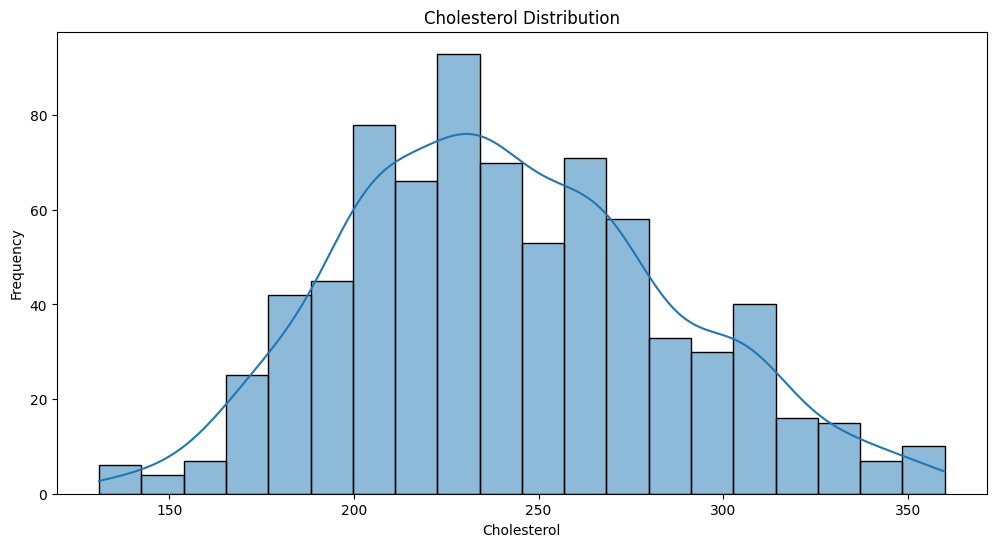

In [13]:
plt.figure(figsize=(12, 6))
sns.histplot(df['chol'], bins=20, kde=True)
plt.title("Cholesterol Distribution")
plt.xlabel("Cholesterol")
plt.ylabel("Frequency")
plt.show()

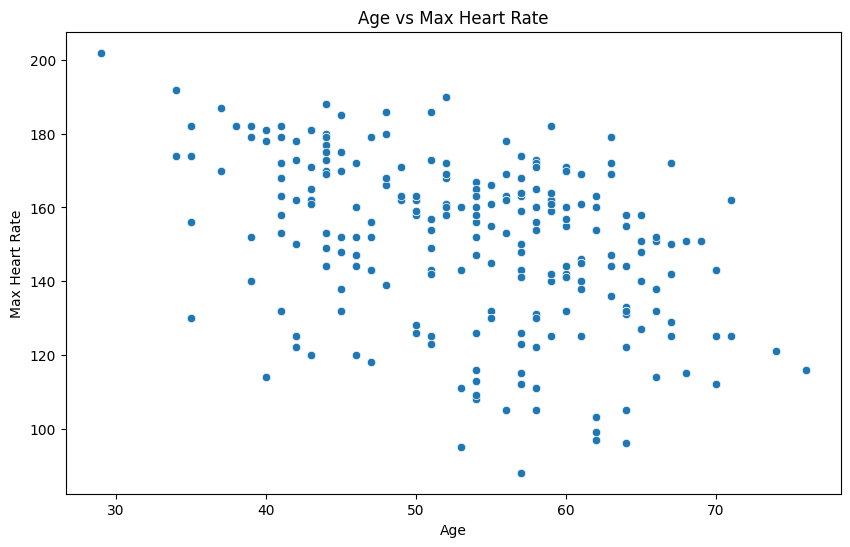

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['age'], y=df['thalach'])
plt.title("Age vs Max Rate")
plt.xlabel("Age")
plt.ylabel("Max Rate ")
plt.show()

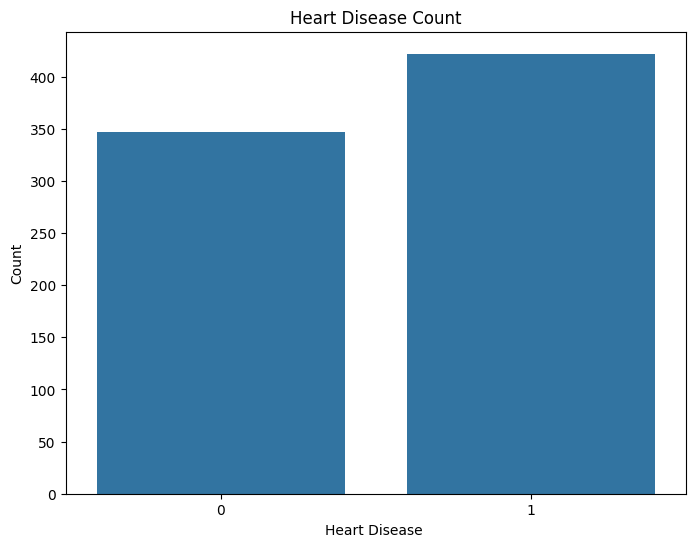

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df['target'])
plt.title("Heart Disease ")
plt.xlabel("Heart  ")
plt.ylabel("Count")
plt.show()

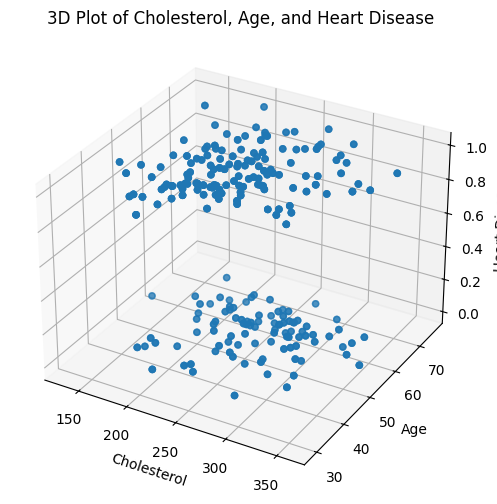

In [ ]:
#
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['chol'], df['age'], df['target'])
ax.set_xlabel('Cholesterol')
ax.set_ylabel('Age')
ax.set_zlabel('Heart Disease')
plt.title("3D")
plt.show()

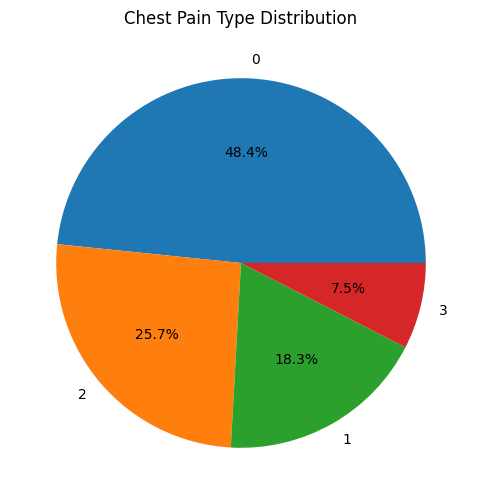

In [ ]:
plt.figure(figsize=(8, 6))
df['cp'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Chest Pain Type ")
plt.ylabel('')
plt.show()